## **Practical Data Science Project - Laptop Price Prediction**
## **Name: Amey Suresh Borkar**
## **Student ID: AB70967N**


----------------------------------------------------------------------------------------------------

### **Abstract:**
Abstract:

Efficient solutions for laptop price prediction are necessary due to the growing variety of laptop characteristics and the ever-changing technology market. This study uses machine learning techniques to create a pricing prediction model for laptops based on a large dataset that includes several parameters including CPU type, RAM size, storage capacity, and display specifications. In order to handle categorical variables, the preprocessing step uses One-Hot Encoding, which improves the model's capacity to identify complex patterns in the data. Next, in order to identify non-linear relationships and generate precise forecasts, a Random Forest Regressor is utilized.


Metrics like Mean Absolute Error and R^2 score are used to evaluate the model and provide information about how accurate and dependable the predictions are. Furthermore, an analysis of feature importance pinpoints the major variables affecting laptop costs. This study adds to our understanding of the intricate processes surrounding laptop pricing and gives manufacturers, retailers, and consumers useful information. The created model provides industry stakeholders with useful insights into effective pricing strategies within the dynamic and competitive landscape of the technology market, in addition to assisting consumers in making educated purchasing decisions.


### **Importing Libraries**

In [6]:
# Data Wrangling
import pandas as pd
import numpy as np

In [7]:
# Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

In [8]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [9]:
# Model
from sklearn.ensemble import RandomForestRegressor

### **Exploring Data**

In [10]:
# Loading the Dataset
df = pd.read_csv('/content/laptop_data.csv')

In [11]:
# Looking the first 5 rows
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
# total number of rows and column in dataset
print(f'The DataSet Contains {df.shape[0]} rows & {df.shape[1]} columns.')

The DataSet Contains 1303 rows & 12 columns.


In [13]:
# getting information related to data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [14]:
# Checking for duplicates
df.duplicated().sum()

0

In [15]:
# Checking if there any null values
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


### **Data Cleaning and Preprocessing**

In [16]:
# Droping the unnamed column
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [18]:
# Removing the GB string form Ram column
df['Ram'] = df['Ram'].str.replace('GB', '')

In [19]:
# Removing the KG string form weight column
df['Weight'] = df['Weight'].str.replace('kg', '')

In [20]:
# Changing the data type of Ram and Weight Column from Object to int and float respectively
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


### **Performing Feature Analysis**

<Axes: xlabel='Price', ylabel='Count'>

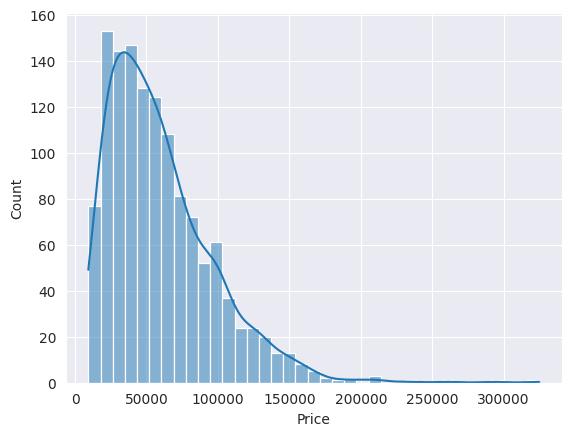

In [22]:
# Price Distribution.
sns.histplot(df['Price'], kde = True)

In [23]:
# Making function for count plot
font = {'size':'18', 'color':'black', 'weight':'normal','verticalalignment':'bottom'}

def countplot(column, xlabel, ylabel, title):
    plt.figure(figsize = (15,6))
    plot = sns.countplot(x= column, data = df)
    plt.setp(plot.get_xticklabels(), rotation=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, **font)
    plt.title(title, **font)
    plt.show()

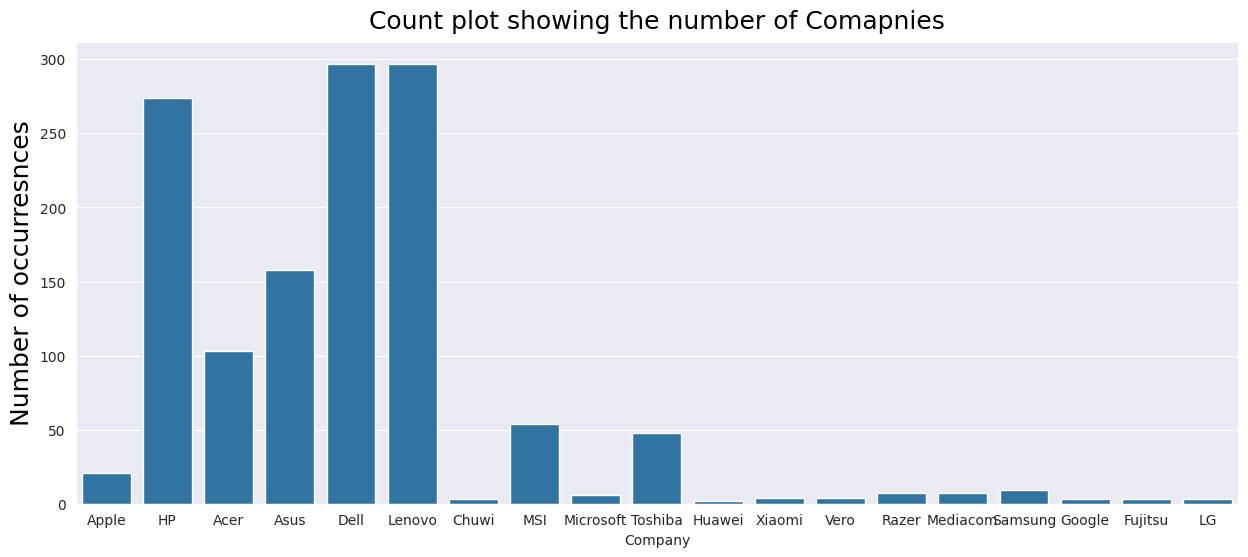

In [24]:
# Company
countplot('Company', 'Company', 'Number of occurresnces', 'Count plot showing the number of Comapnies')

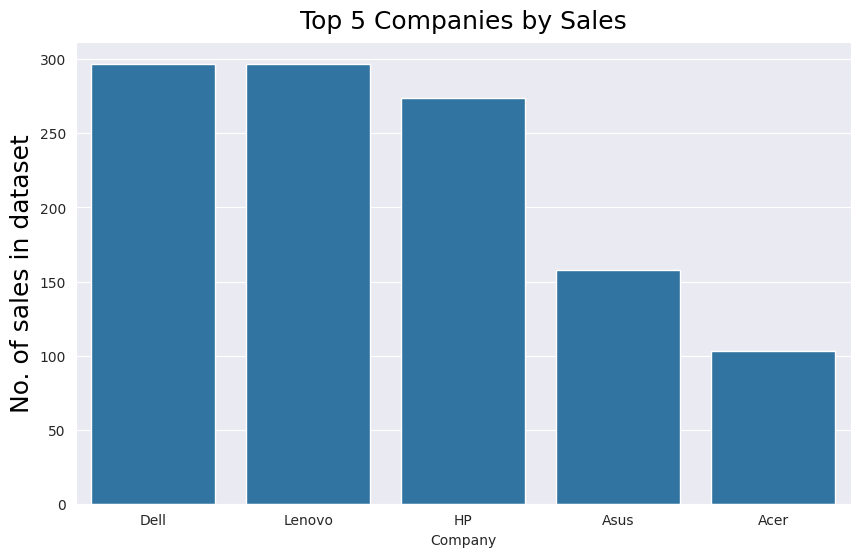

In [112]:
# Making function for count plot
font = {'size':'18', 'color':'black', 'weight':'normal','verticalalignment':'bottom'}

def top5_count(column, xlabel, ylabel, title):
    plt.figure(figsize = (10,6))
    plot = sns.countplot(x= column, data = df, order=df[column].value_counts().iloc[:5].index) # Limit to top 5
    plt.setp(plot.get_xticklabels(), rotation=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, **font)
    plt.title(title, **font)
    plt.show()

# Company (displaying only top 5 companies)
top5_count('Company', 'Company', 'No. of sales', 'Top 5 Companies by Sales')

##### **From the above count plot we can see that, most of the laptops are of HP, Dell and Lenovo.**

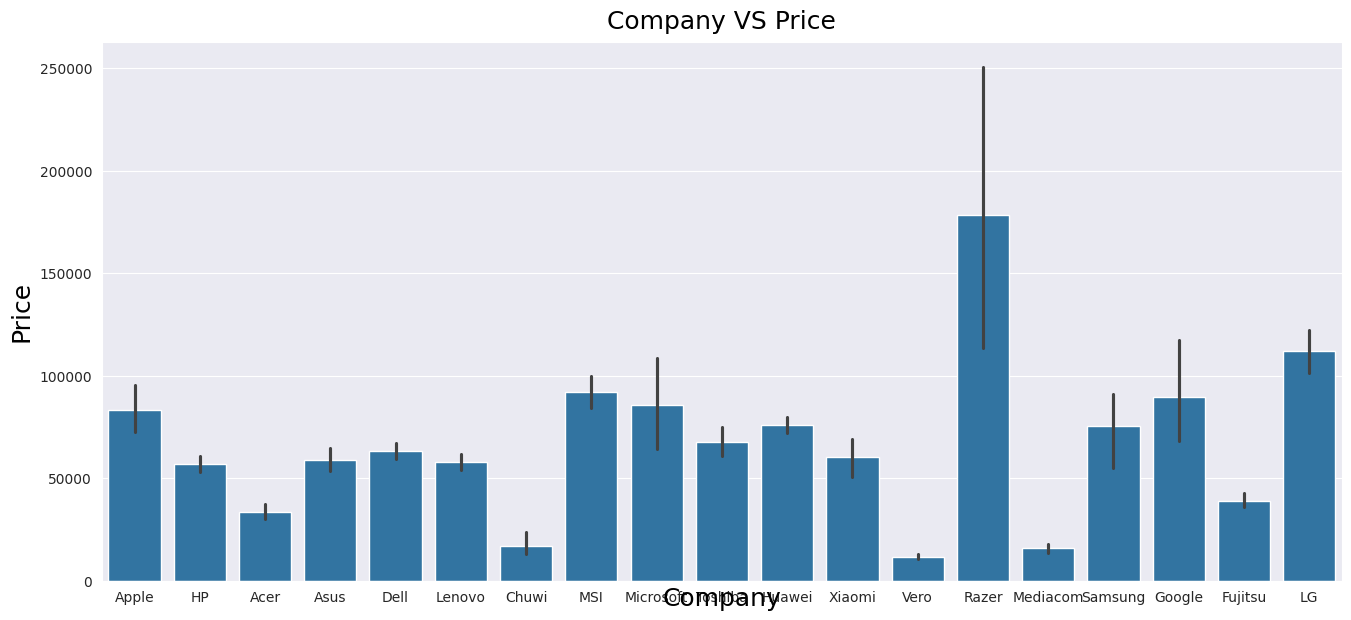

In [25]:
plt.figure(figsize = (16,7))
plot = sns.barplot(x = df['Company'], y= df['Price'])
plt.xticks(rotation = 'vertical')
plt.setp(plot.get_xticklabels(), rotation=0)
plt.xlabel('Company',  **font)
plt.ylabel('Price', **font)
plt.title('Company VS Price', **font)
plt.show()
plt.show()

##### **Here, we can see that Razer brand laptops are expensive than other.**

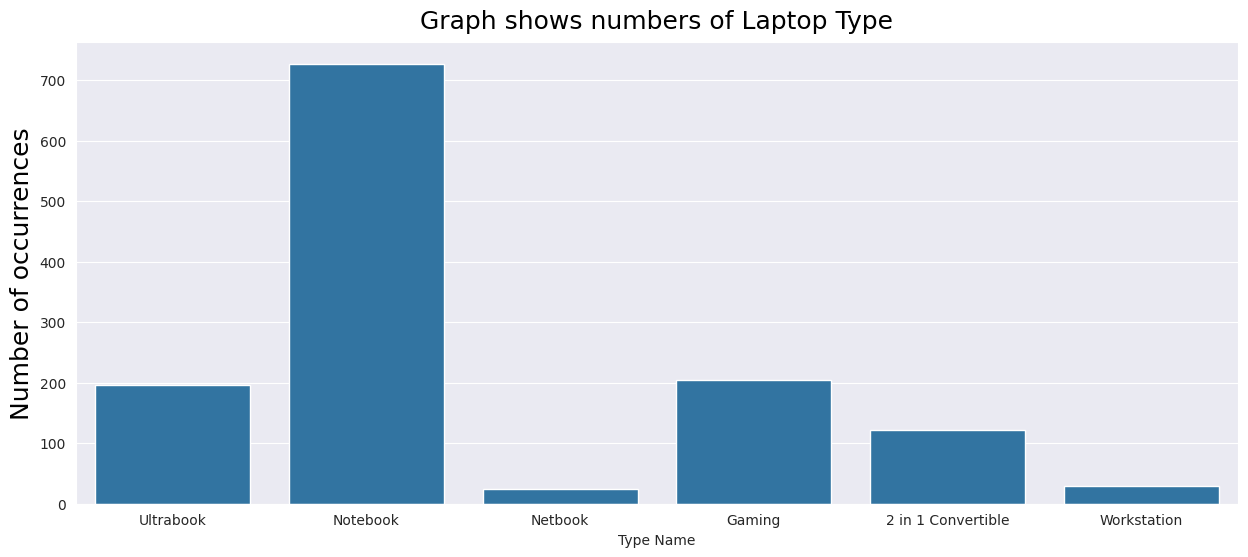

In [26]:
# Typename
countplot('TypeName', 'Type Name', 'Number of occurrences', 'Graph shows numbers of Laptop Type')

###### **From above count plot, we can conclude that Notebook are the most in the data set**

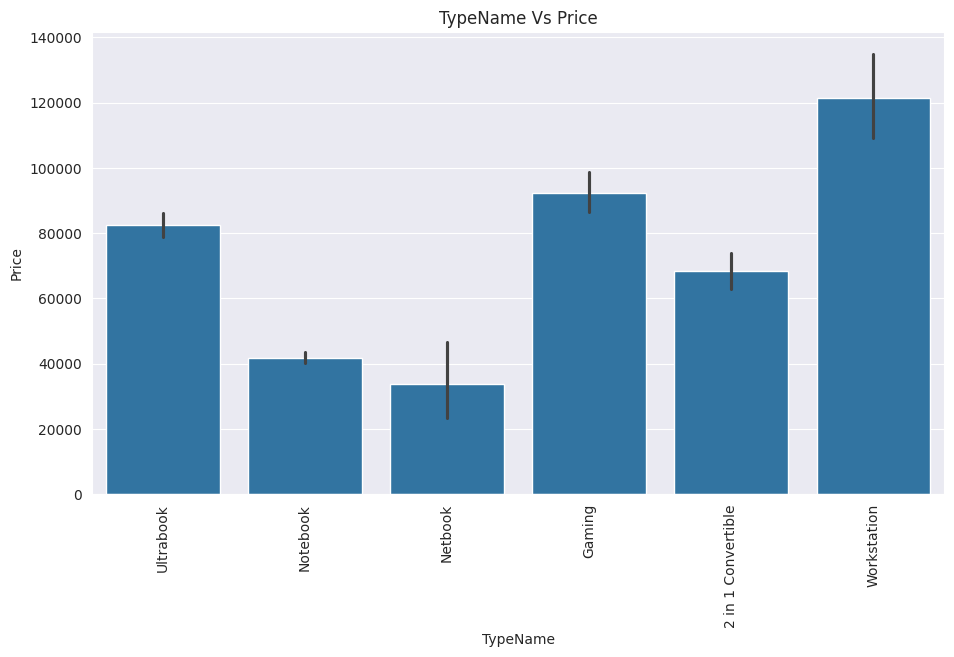

In [27]:
plt.figure(figsize = (11,6))
sns.barplot(x = df['TypeName'], y= df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('TypeName Vs Price')
plt.show()

###### **Workstation laptops are most costly than others.**

<Axes: xlabel='Inches', ylabel='Count'>

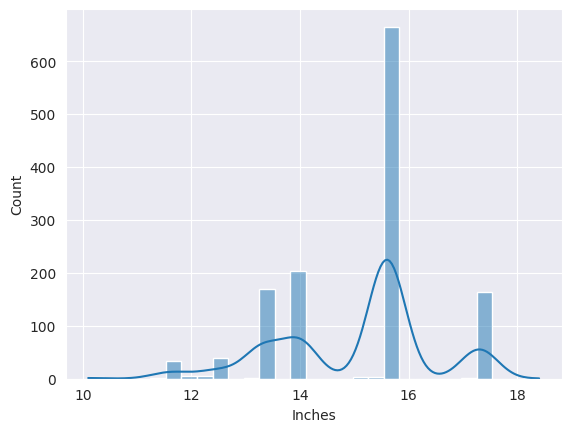

In [28]:
# Size
sns.histplot(df['Inches'], kde = True)

<Axes: xlabel='Inches', ylabel='Price'>

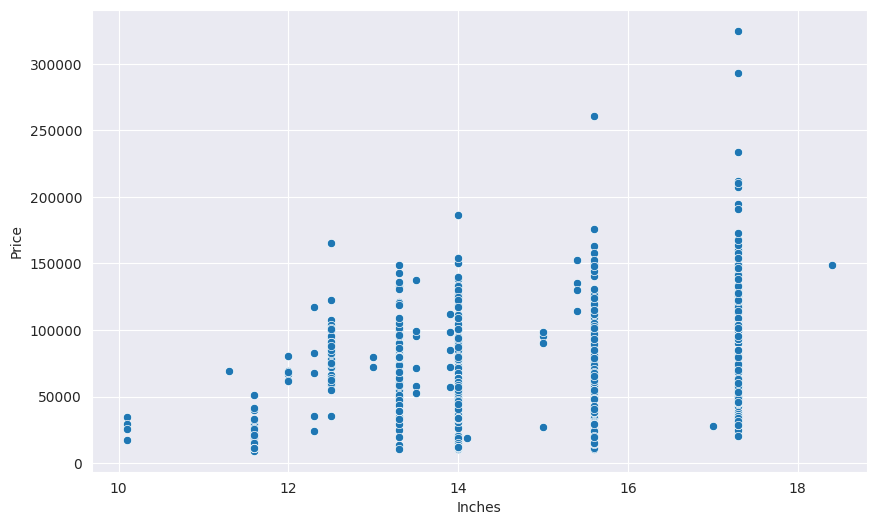

In [29]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['Inches'], y = df['Price'])

###### **From above graph we can see that the price of laptop is directly propertional to size of laptop screen, i.e. higher the size of laptop screen, the higher the price of laptop.**

### **Feature Engineering**

In [30]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [31]:
# Fetching touchscreen data from screenresolution column
df['touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

In [32]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen
325,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44,15557.7600,0
788,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,122490.7200,0
353,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,2.60,92615.0256,0
158,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56,55890.7200,1
265,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.67,42570.7200,1


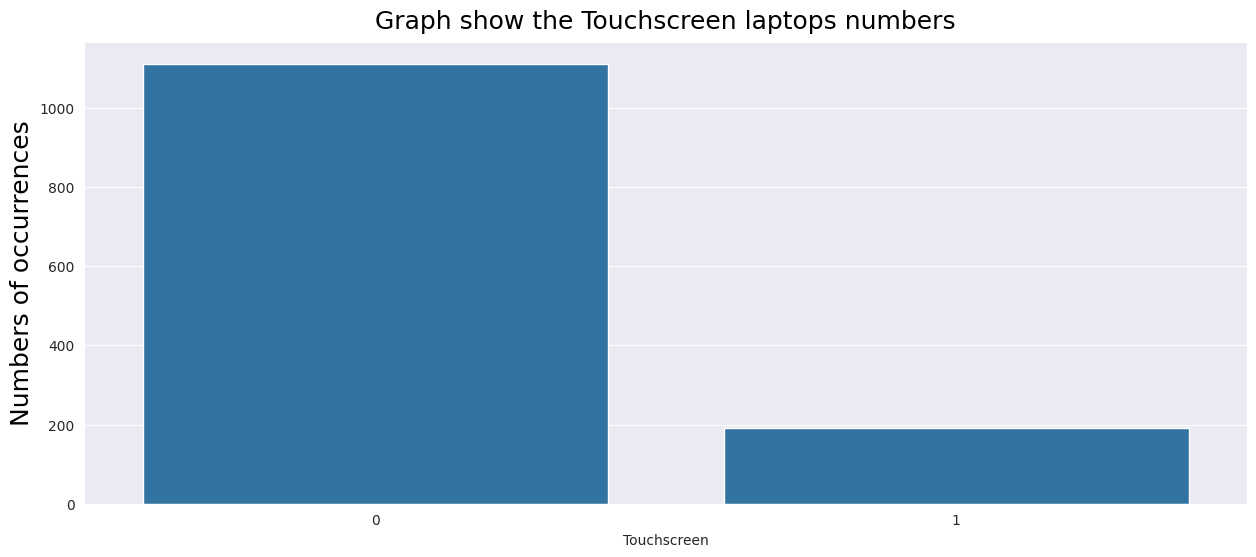

In [33]:
# Screenresolution
countplot('touchscreen','Touchscreen', 'Numbers of occurrences', 'Graph show the Touchscreen laptops numbers')

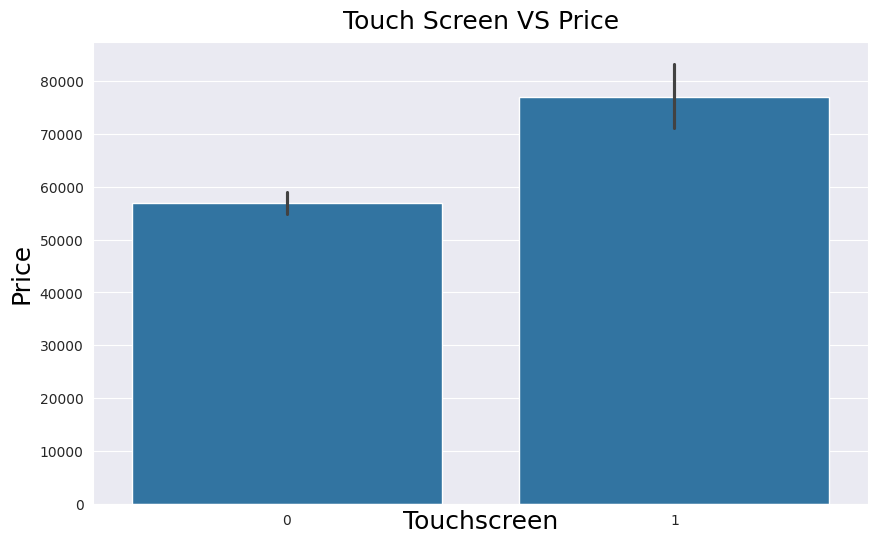

In [34]:
plt.figure(figsize = (10,6))
sns.barplot(x = df['touchscreen'], y = df['Price'])
plt.title('Touch Screen VS Price', ** font)
plt.xlabel('Touchscreen', **font)
plt.ylabel('Price', **font)
plt.show()

In [35]:
# Fetching if Ips pannel is present in Screenresolution and storing it in new column
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [36]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips
719,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.630,63936.00,0,0
105,HP,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.580,35111.52,0,1
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.200,77202.72,0,0
1120,Vero,Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.350,10442.88,0,0
1185,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.591,48431.52,0,1


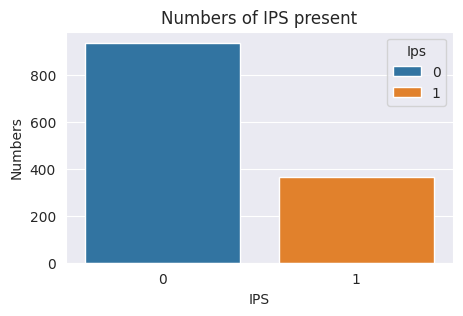

In [37]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Ips', data=df, hue='Ips', dodge=False)
plt.title('Numbers of IPS present')
plt.xlabel('IPS')
plt.ylabel('Numbers')
plt.show()

###### **Most of the laptops are Non Ips in the dataset**

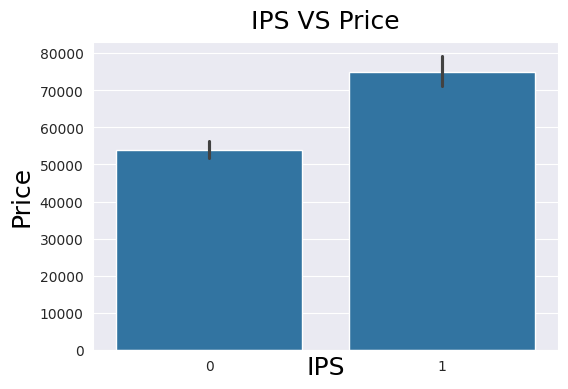

In [38]:
plt.figure(figsize = (6,4))
sns.barplot(x = df['Ips'], y = df['Price'])
plt.title('IPS VS Price', ** font)
plt.xlabel('IPS', **font)
plt.ylabel('Price', **font)
plt.show()

###### **From above plot we can see that, Price of the laptop depends on IPs panel**

In [39]:
# fetching x resolution & y resolution from the screen resolution column
res = df['ScreenResolution'].str.split('x', n =1, expand = True)

In [40]:
df['X_res'] = res[0]
df['Y_res'] = res[1]

In [41]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [42]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [45]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [47]:
# finding pixels per inch
df['ppi'] = (((df['X_res'] **2) + (df['Y_res'] **2)) **0.5) / df['Inches'].astype('float')

In [48]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [49]:
df.drop(columns = ['X_res', 'Y_res', 'Inches', 'ScreenResolution'], inplace = True)

In [50]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [51]:
df['CpuName'] = df['Cpu'].apply(lambda x :" " .join(x.split()[:3]))

In [52]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [53]:
df['Cpu brand'] = df['CpuName'].apply(fetch_processor)

In [54]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,CpuName,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [55]:
df.drop(columns = ['Cpu', 'CpuName'], inplace = True)

In [56]:
df.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


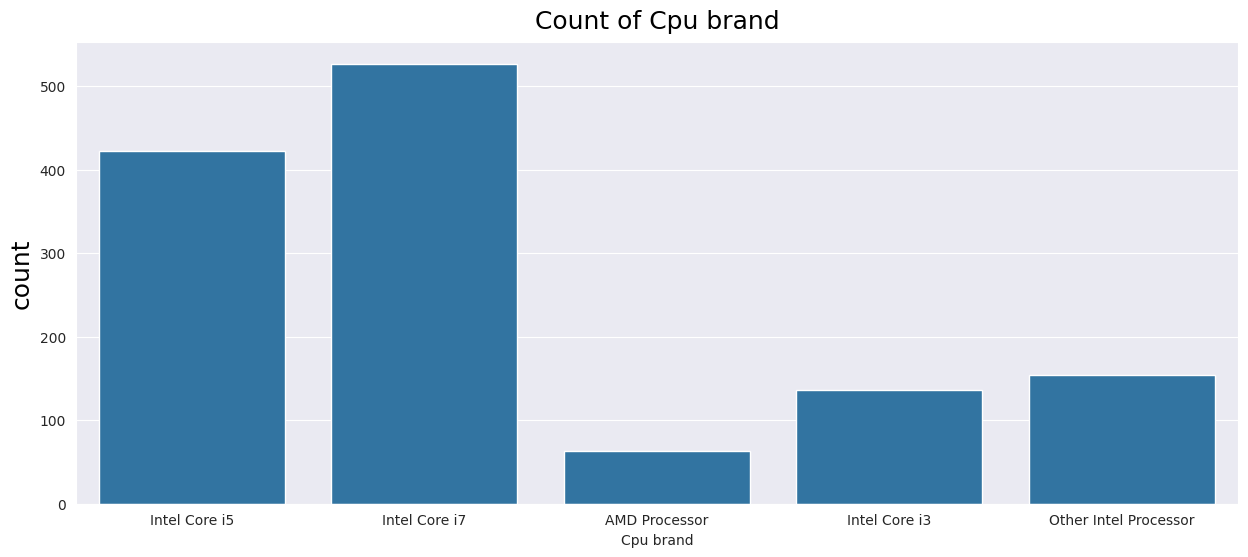

In [57]:
countplot('Cpu brand', 'Cpu brand', 'count', 'Count of Cpu brand')

###### **Cpu brand intel i7 and intel i5 are in majority in dataset**

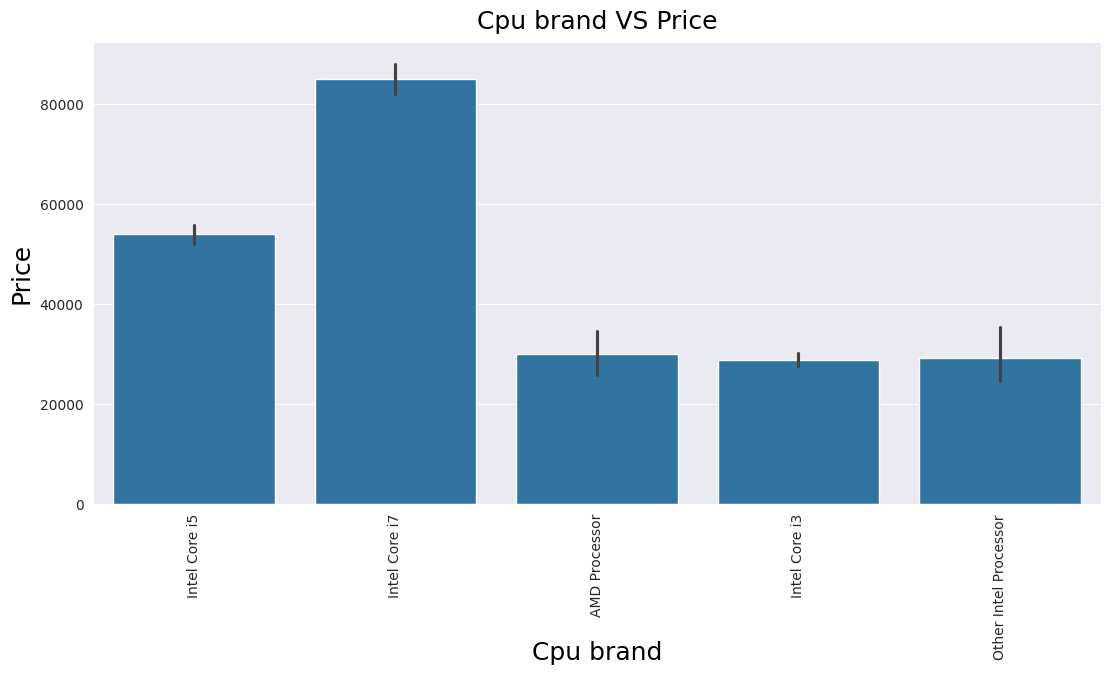

In [58]:
plt.figure(figsize = (13,6))
sns.barplot(x = 'Cpu brand', y = 'Price', data = df)
plt.xticks(rotation = 90)
plt.xlabel('Cpu brand',  **font)
plt.ylabel('Price', **font)
plt.title('Cpu brand VS Price', **font)
plt.show()

###### **Intel i7 is costlier than any other Processor**

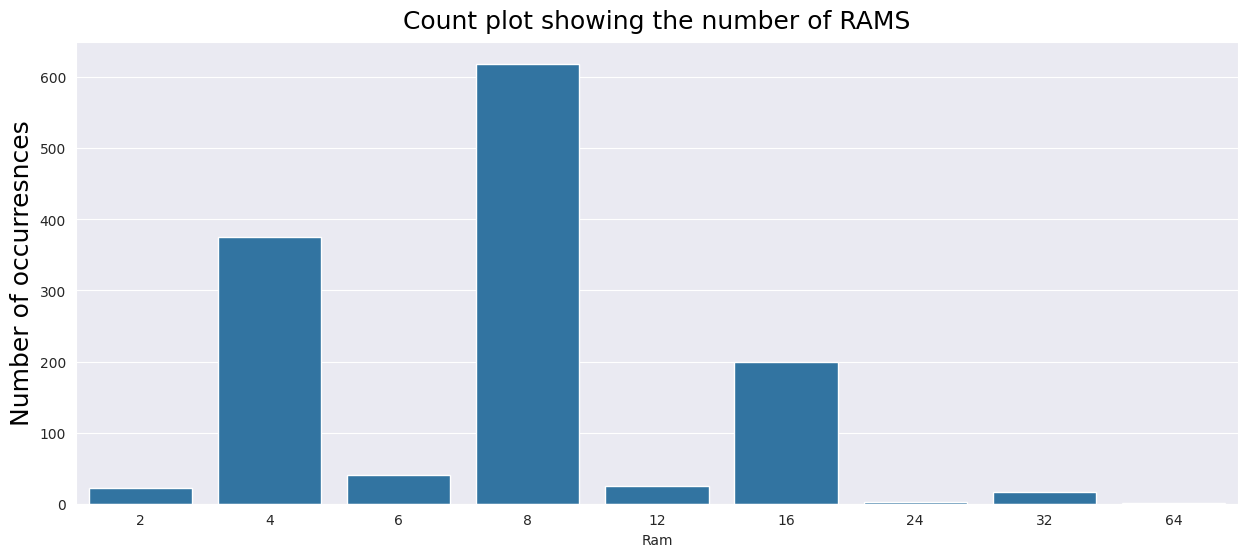

In [59]:
countplot('Ram', 'Ram', 'Number of occurresnces', 'Count plot showing the number of RAMS')

###### **Most of the laptops in the dataset have 8GB RAM**

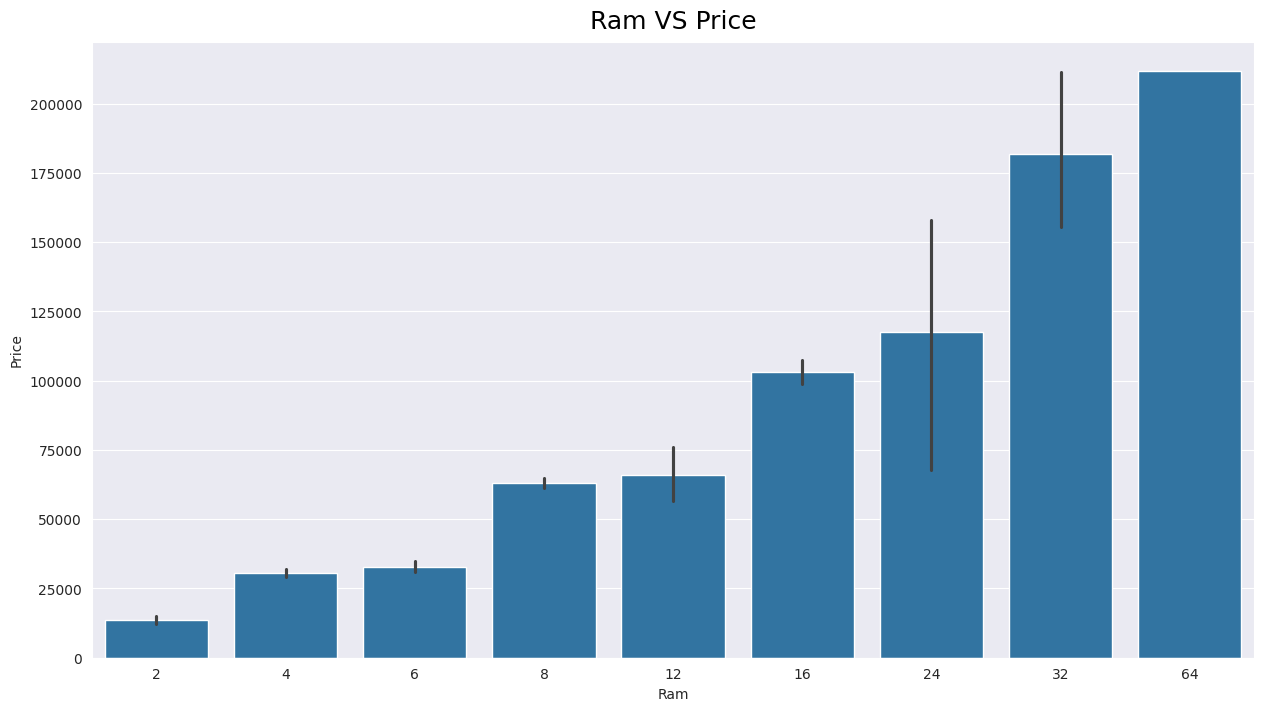

In [60]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Ram', y = 'Price', data = df)
# plt.xlabel('Ram',  **font)
# plt.ylabel('Price', **font)
plt.title('Ram VS Price', **font)
plt.show()

###### **From above plot we can see that, Price of laptop is directly propertional to the RAM**

In [61]:
# In memory column it have many different disk sapce categories fetching only hdd and ssd form memory column and storing it in a new column.
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [62]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex = True)

#Replacing GB to ''(null or empty)
df['Memory'] = df['Memory'].str.replace('GB', '')

#Replacing TB to 000 (1TB = 1000GB)
df['Memory'] = df['Memory'].str.replace('TB', '000')

In [63]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [64]:
new = df['Memory'].str.split('+', n=1, expand =True)

In [65]:
new.head()

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None


In [66]:
new.value_counts()

0                  1          
128 SSD            1000 HDD       94
256 SSD            1000 HDD       73
512 SSD            1000 HDD       14
256 SSD            2000 HDD       10
512 SSD            2000 HDD        3
1000 SSD           1000 HDD        2
128 SSD            2000 HDD        2
256 SSD            256 SSD         2
                   500 HDD         2
1000 HDD           1000 HDD        1
256 SSD            1000 Hybrid     1
512 SSD            1000 Hybrid     1
                   256 SSD         1
                   512 SSD         1
64 Flash Storage   1000 HDD        1
Name: count, dtype: int64

In [67]:
df['first'] = new[0]

In [68]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [69]:
df["first"]=df["first"].str.strip()

In [70]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [71]:
df['second'] = new[1]

In [72]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first,second
812,Samsung,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,0.81,79866.7200,0,0,165.632118,Intel Core i5,256 SSD,None
67,HP,Notebook,4,32 SSD,Intel HD Graphics 400,Windows 10,1.44,12201.1200,0,0,111.935204,Other Intel Processor,32 SSD,None
176,Acer,Notebook,4,128 SSD,Intel HD Graphics 520,Windows 10,2.10,23922.7200,0,0,100.454670,Intel Core i3,128 SSD,None
990,HP,Netbook,8,512 SSD,Intel HD Graphics 515,Windows 10,0.97,101658.2400,0,0,176.232574,Other Intel Processor,512 SSD,None
1154,Dell,Notebook,8,256 SSD,Nvidia GeForce 960M,Windows 10,2.04,119916.2304,1,1,282.423996,Intel Core i5,256 SSD,None


In [73]:
df['first'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '64 Flash Storage', '32 SSD', '2000 HDD', '64 SSD', '1000 Hybrid',
       '1000 SSD', '16 SSD', '16 Flash Storage', '180 SSD', '32 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid'],
      dtype=object)

In [74]:
df['Layer1hdd'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1ssd'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)

In [75]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first,second,Layer1hdd,Layer1ssd
473,Dell,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.42,98133.7680,1,0,165.632118,Intel Core i5,256 SSD,None,0,1
46,Lenovo,Notebook,4,128 SSD,Intel HD Graphics 520,No OS,2.20,19660.3200,0,0,100.454670,Intel Core i3,128 SSD,None,0,1
601,HP,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,2.10,35616.6144,0,0,100.454670,Intel Core i3,500 HDD,None,1,0
59,Asus,Notebook,4,256 SSD,Intel HD Graphics 520,Linux,2.00,22111.2000,0,0,141.211998,Intel Core i3,256 SSD,None,0,1
1128,Lenovo,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,No OS,2.40,52693.9200,0,1,141.211998,Intel Core i5,128 SSD,1000 HDD,0,1


In [76]:
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

In [77]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first,second,Layer1hdd,Layer1ssd
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,None,0,1
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,None,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,None,0,1
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,None,0,1
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,None,0,1


In [78]:
df["second"].fillna("0", inplace = True)
df["Layer2hdd"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2ssd"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["second"]=df["second"].str.strip()
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

<ipython-input-78-135c5ec6b98b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [79]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first,second,Layer1hdd,Layer1ssd,Layer2hdd,Layer2ssd
676,Asus,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.10,60472.80,0,0,157.350512,Intel Core i5,256,0,0,1,0,0
1007,HP,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 7,1.43,77202.72,0,0,157.350512,Intel Core i7,256,0,0,1,0,0
406,Toshiba,Ultrabook,16,512 SSD,Intel HD Graphics 520,Windows 10,1.20,93080.16,0,0,165.632118,Intel Core i7,512,0,0,1,0,0
1042,Toshiba,Notebook,16,256 SSD,Nvidia GeForce 930M,Windows 10,2.40,75924.00,0,1,141.211998,Intel Core i7,256,0,0,1,0,0
1189,Acer,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.20,138474.72,0,1,127.335675,Intel Core i7,256,1000,0,1,1,0


In [80]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [81]:
df["HDD"]=(df["first"]*df["Layer1hdd"]+df["second"]*df["Layer2hdd"])
df["SSD"]=(df["first"]*df["Layer1ssd"]+df["second"]*df["Layer2ssd"])

In [82]:
df.drop(columns=['first', 'second', 'Layer1hdd', 'Layer1ssd', 'Layer2hdd', 'Layer2ssd'],inplace=True)

In [83]:
df.drop(columns = 'Memory', inplace = True)

In [84]:
df.head(20)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256
5,Acer,Notebook,4,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,AMD Processor,500,0
6,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,0,0
7,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,Intel Core i5,0,0
8,Asus,Ultrabook,16,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,Intel Core i7,0,512
9,Acer,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5,0,256


In [85]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [86]:
df['Gpu brand']  = df['Gpu'].apply(lambda x:x.split()[0])

In [87]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [88]:
df = df[df['Gpu brand'] != 'ARM']

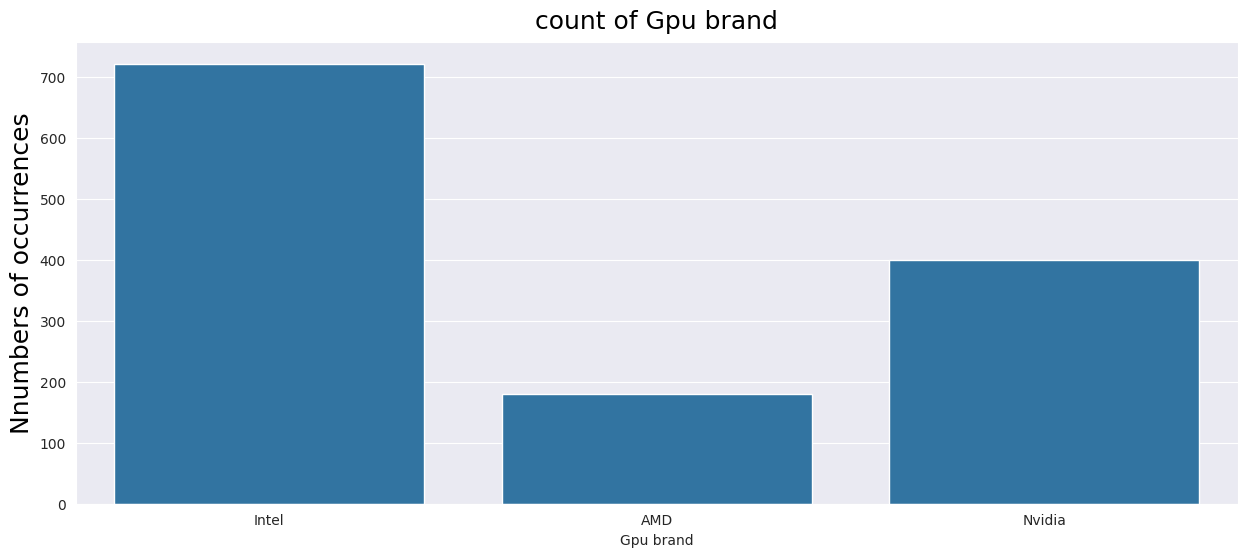

In [89]:
countplot('Gpu brand', 'Gpu brand', 'Nnumbers of occurrences', 'count of Gpu brand')

###### **Most of the laptops in the dataset contain GPU of Intel brand**

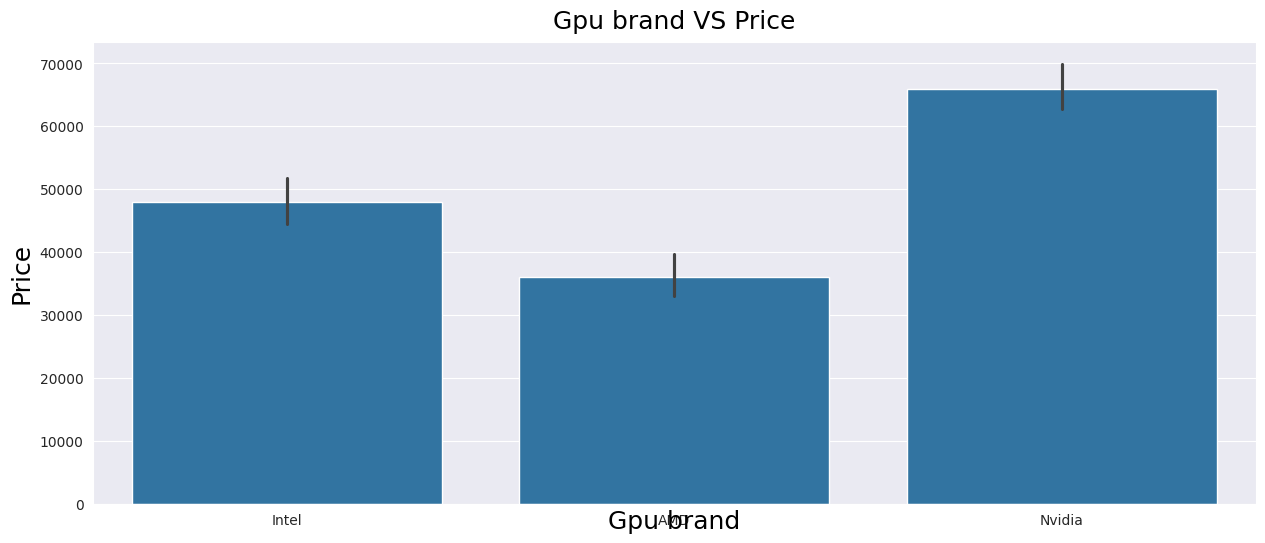

In [90]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xlabel('Gpu brand',  **font)
plt.ylabel('Price', **font)
plt.title('Gpu brand VS Price', **font)
plt.show()

###### **Nvidia is far more expensive than any other GPU**

In [91]:
df.drop(columns=['Gpu'],inplace=True)

In [92]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [93]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [94]:
def cat_os(os):
    if os == 'Windows 10' or os == 'Windows 7' or os == 'Windows 10 S':
        return 'Windows'
    elif os == 'Mac OS X' or os == 'macOS':
        return 'Mac'
    else:
        return 'others/NO OS/Linux'

In [95]:
df['OS'] = df['OpSys'].apply(cat_os)

In [96]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,others/NO OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [97]:
df.drop(columns = 'OpSys', inplace = True)

In [98]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
290,Acer,Notebook,2,2.19,10602.7200,0,0,100.454670,Other Intel Processor,0,16,Intel,others/NO OS/Linux
773,Dell,Gaming,8,2.62,58554.7200,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
485,Lenovo,Notebook,8,1.75,55890.7200,0,1,157.350512,Intel Core i5,0,256,Intel,Windows
709,HP,Notebook,6,2.71,34898.9328,0,1,127.335675,AMD Processor,2000,0,AMD,Windows
548,HP,Notebook,4,1.86,21152.1600,0,0,141.211998,Intel Core i3,500,0,Intel,Windows


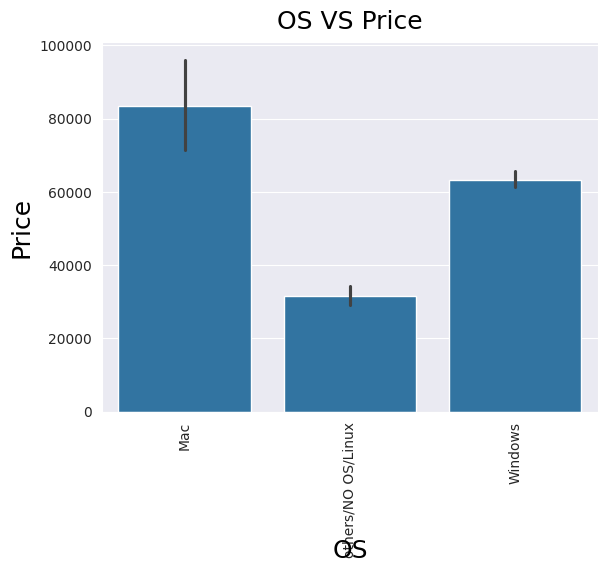

In [99]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.xlabel('OS',  **font)
plt.ylabel('Price', **font)
plt.title('OS VS Price', **font)
plt.show()

##### **Mac is pricier than other operating systems.**

<Axes: xlabel='Weight', ylabel='Count'>

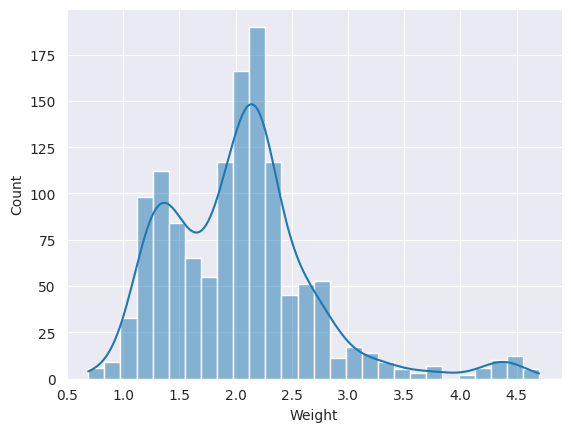

In [100]:
sns.histplot(df['Weight'], kde=True)

Text(0.5, 1.0, 'Weight VS Price')

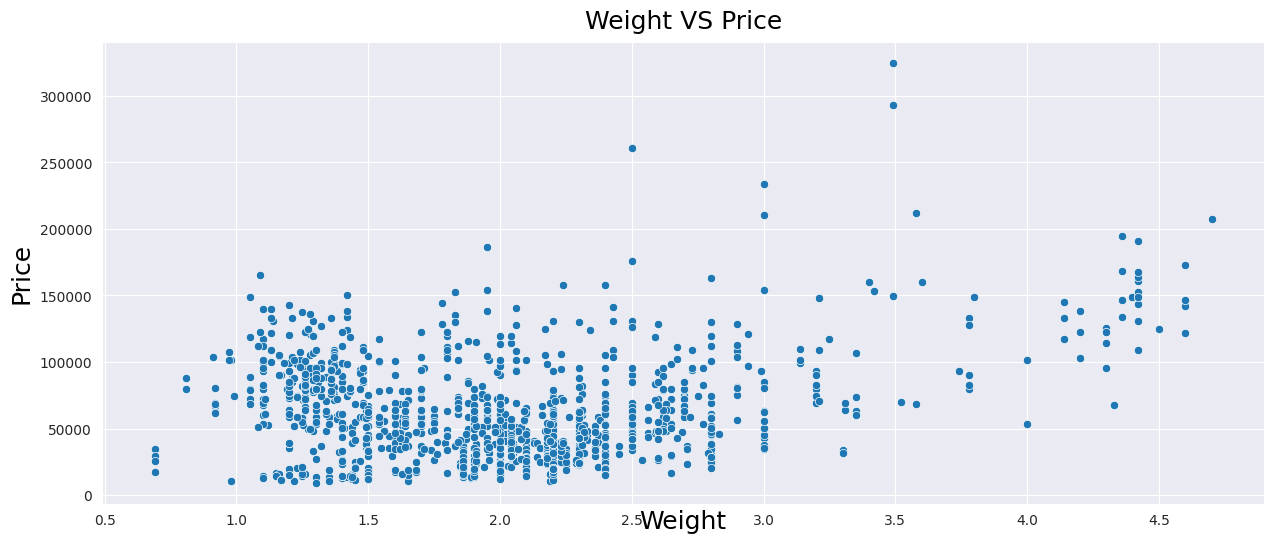

In [101]:
plt.figure(figsize = (15,6))
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.xlabel('Weight',  **font)
plt.ylabel('Price', **font)
plt.title('Weight VS Price', **font)

In [102]:
# Step 1: Convert 'Price' to numeric, coercing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Step 2: Check for any non-numeric values or NaNs after conversion
print(df['Price'].isna().sum())  # This will tell how many NaNs are present

# Optional: Drop rows where 'Price' is NaN (if these rows are not needed)
df = df.dropna(subset=['Price'])

# Step 3: Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Now calculate correlation
correlation = numeric_df.corr()['Price']
print(correlation)

0
Ram            0.742905
Weight         0.209867
Price          1.000000
touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64


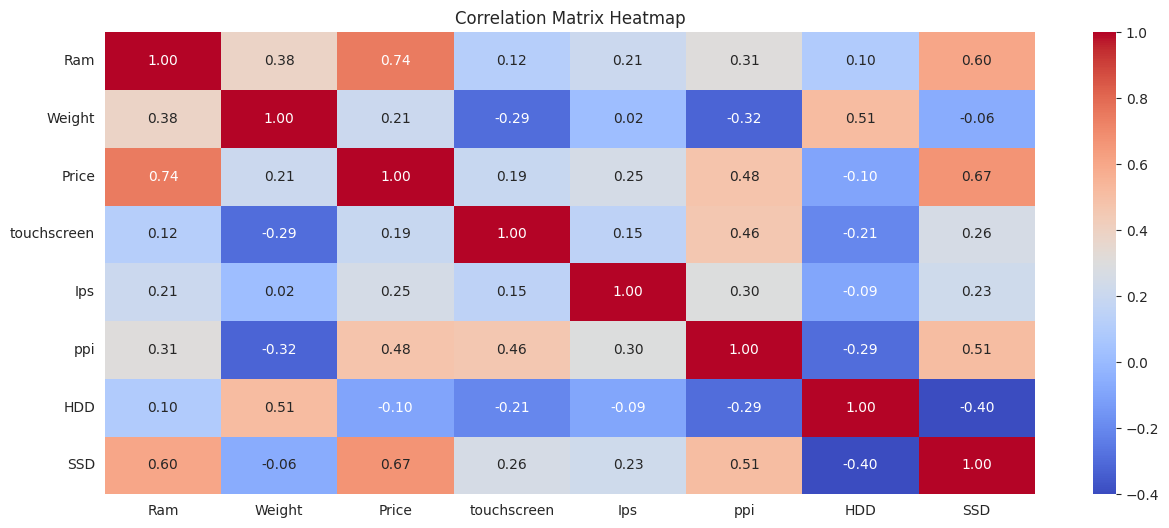

In [103]:
plt.figure(figsize=(15, 6))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Create a heatmap of the correlation matrix of the numeric DataFrame with annotations
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix Heatmap")

plt.show()

<Axes: xlabel='Price', ylabel='Count'>

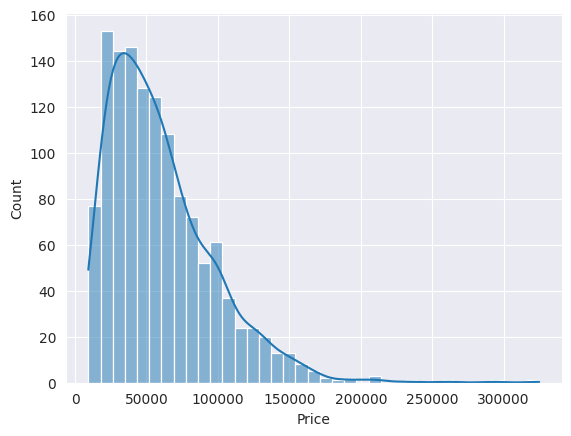

In [104]:
sns.histplot(df['Price'], kde=True)

<Axes: xlabel='Price', ylabel='Count'>

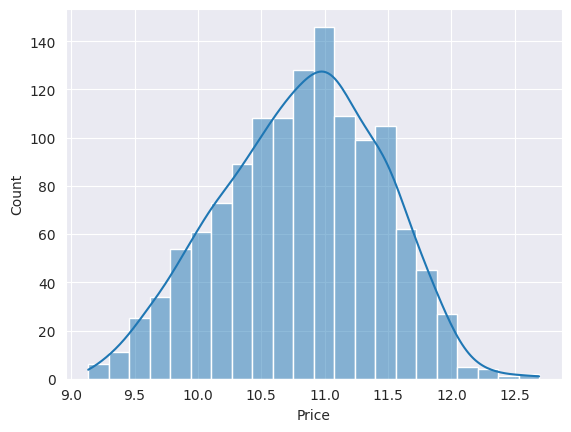

In [105]:
# Normalizing the price using log
sns.histplot(np.log(df['Price']), kde=True)

In [106]:
X = df.drop(columns=['Price'])
Y = np.log(df['Price'])

In [107]:
X.head()

,Company,TypeName,Ram,Weight,touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,others/NO OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [108]:
Y.head()

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101


In [109]:
# Spliting the dataset.
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=5)

### **Applying Random Forest Regressor**

In [110]:
# Applying One-Hot Encoding to represent categorical variables as binary vectors.
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11]) # Changed 'sparse' to 'sparse_output'
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=300,
                              random_state=1,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=20)

# Combines the transformation (step1) and the regression model (step2) into a pipeline.
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score:',r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE):',mean_absolute_error(y_test,y_pred))

R2 score: 0.9150123959096494
Mean Absolute Error (MAE): 0.1424436083778887


### **Conclusion:**

In conclusion, this study shows that machine learning—more especially, the use of Random Forest Regressor and One-Hot Encoding—is effective at accurately predicting laptop prices. Metrics such as Mean Absolute Error and R^2 score are used to evaluate the developed model, which provides trustworthy insights into pricing dynamics. The feature importance analysis helps industry stakeholders develop efficient pricing strategies and provides useful information for consumers making purchase decisions.  This study emphasizes how machine learning can be used to better understand and react to market dynamics.


### **Future Work:**

##### **What you would have done differently if you would have more:**

- **Time:** Conduct extensive hyperparameter tuning to optimize the Random Forest Regressor and explore alternative regression algorithms.

- **Analytics programming skills:** Implement sophisticated feature engineering techniques and explore advanced regression models, such as neural networks or ensemble methods.

- **Better data:** Seek access to a more extensive and diverse dataset, including information on evolving consumer preferences and market trends for a more comprehensive understanding of the laptop market.

- **Better functions/ algorithms shipped with libraries, packages:** Explore and incorporate state-of-the-art algorithms and functions available in machine learning libraries to potentially improve the model's accuracy and generalization.

- **Upfront training on using Spark, Cloud any technology:** Pursue training in scalable technologies like Apache Spark or cloud platforms (AWS, Google Cloud, Azure) to enable processing of larger datasets and enhance model deployment in production environments.

- **More knowledge of cloud platforms:** Deepen understanding of cloud platforms to leverage cloud-based resources for data storage, processing, and model deployment, improving accessibility, performance, and scalability.


### **References and Publications Used:**

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
- https://scikit-learn.org/dev/index.html
- VanderPlas, J. (2016). Python Data Science Handbook. O'Reilly Media.
- VanderPlas, J. (2017). A Whirlwind Tour of Python. O'Reilly Media.
- Müller, A. C., & Guido, S. (2016). Introduction to Machine Learning with Python: A Guide for Data Scientists. O'Reilly Media.